In [3]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

Python REPL can execute arbitrary code. Use with caution.


In [4]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [5]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [6]:
session_id = '07870565'

In [7]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.6613863706588745
Formulating a new plan based on User input
Modifying plan with function metadata
{'Plan': {'messages': [HumanMessage(content="Here is the plan to plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season:\n\n1. Use the `playerid_lookup` function to get the 'key_mlbam' ID for Danny Duffy by passing in his last name 'duffy' and first name 'danny'.\n\n2. Use the `statcast_pitcher` function to get Danny Duffy's pitch-level data for the 2018 season. Pass in the following:\n   - start_dt: '2018-01-01'\n   - end_dt: '2018-12-31' \n   - player_id: Use the 'key_mlbam' value from step 1\n\n3. From the output of `statcast_pitcher`, select only the 'game_date' and 'events' columns.\n\n4. Create a new column 'strikeout' that is 1 when the 'events' value is 'strikeout' and 0 otherwise.\n\n5. Group the data by 'game_date' and sum the 'strikeout' column to get Duffy's strikeout total for each game

In [8]:
task = '''Label the x-axis "Game Date" and the y-axis "Total K's"'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Here is the revised plan to plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season:\n\n1. Use the `playerid_lookup` function to get the \'key_mlbam\' ID for Danny Duffy by passing in his last name \'duffy\' and first name \'danny\'.\n\n2. Use the `statcast_pitcher` function to get Danny Duffy\'s pitch-level data for the 2018 season. Pass in the following:\n   - start_dt: \'2018-01-01\'\n   - end_dt: \'2018-12-31\' \n   - player_id: Use the \'key_mlbam\' value from step 1\n\n3. From the output of `statcast_pitcher`, select only the \'game_date\' and \'events\' columns.\n\n4. Create a new column \'strikeout\' that is 1 when the \'events\' value is \'strikeout\' and 0 otherwise.\n\n5. Group the data by \'game_date\' and sum the \'strikeout\' column to get Duffy\'s strikeout total for each game.\n\n6. Sort the data by \'game_date\'.\n\n7. Calculate the cumulative sum of the \'str

{'Orchestrate': {'next': 'Convert'}}
----
{'Convert': {'code': "\n# Import necessary libraries\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom pybaseball import playerid_lookup, statcast_pitcher\n\n# 1. Get Danny Duffy's 'key_mlbam' ID\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]\n\n# 2. Get Danny Duffy's pitch-level data for 2018 season\nduffy_2018 = statcast_pitcher('2018-01-01', '2018-12-31', duffy_id)\n\n# 3. Select relevant columns\nduffy_2018 = duffy_2018[['game_date', 'events']]\n\n# 4. Create 'strikeout' column\nduffy_2018['strikeout'] = duffy_2018['events'].apply(lambda x: 1 if x == 'strikeout' else 0)\n\n# 5. Group by game_date and sum strikeouts\nduffy_daily_k = duffy_2018.groupby('game_date')['strikeout'].sum().reset_index()\n\n# 6. Sort by game_date\nduffy_daily_k = duffy_daily_k.sort_values('game_date')\n\n# 7. Calculate cumulative sum of strikeouts\nduffy_daily_k['cum_sum_k'] = duffy_daily_k['strikeout'].cumsum()\n\n# 8. Plot cumulativ

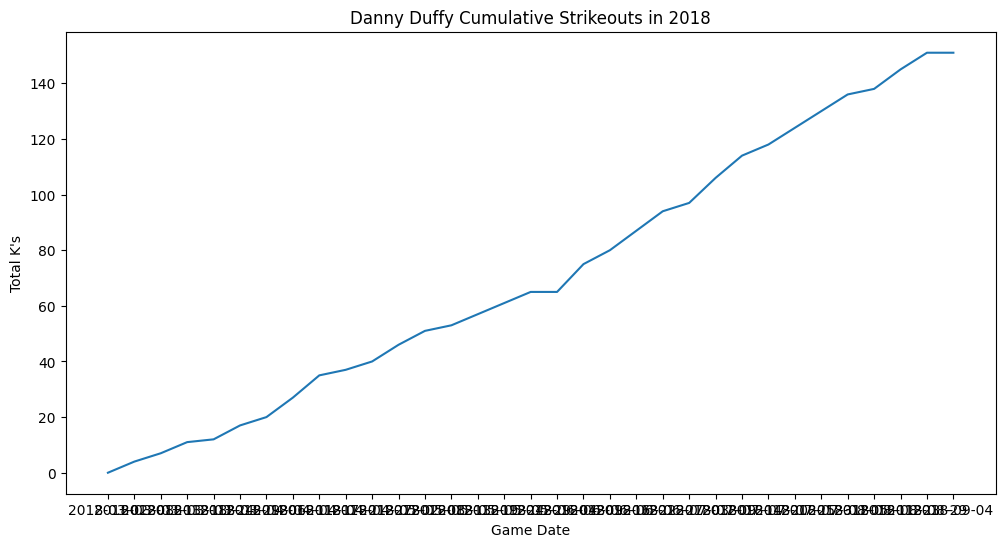

{'Execute': {'messages': [AIMessage(content="\nHere is the code that was used to reach this solution:\n```python\n\n# Import necessary libraries\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom pybaseball import playerid_lookup, statcast_pitcher\n# 1. Get Danny Duffy's 'key_mlbam' ID\nduffy_id = playerid_lookup('duffy', 'danny')['key_mlbam'].values[0]\n# 2. Get Danny Duffy's pitch-level data for 2018 season\nduffy_2018 = statcast_pitcher('2018-01-01', '2018-12-31', duffy_id)\n# 3. Select relevant columns\nduffy_2018 = duffy_2018[['game_date', 'events']]\n# 4. Create 'strikeout' column\nduffy_2018['strikeout'] = duffy_2018['events'].apply(lambda x: 1 if x == 'strikeout' else 0)\n# 5. Group by game_date and sum strikeouts\nduffy_daily_k = duffy_2018.groupby('game_date')['strikeout'].sum().reset_index()\n# 6. Sort by game_date\nduffy_daily_k = duffy_daily_k.sort_values('game_date')\n# 7. Calculate cumulative sum of strikeouts\nduffy_daily_k['cum_sum_k'] = duffy_daily_k['strikeo

In [9]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [10]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [AIMessage(content='Thank you, task has been commited to memory')], 'previous_node': 'Memorize'}}
----
Thank you, task has been commited to memory
